# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [ ]:
import numpy as np
# Crea un array NumPy con i prezzi (in euro) di 5 libri:
prezzi_euro_libri = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])
prezzi_euro_libri

#1. Calcola il prezzo medio dei libri

prezzo_medio_libri = np.mean(prezzi_euro_libri)
prezzo_medio_libri

# 2. Seleziona i libri con un prezzo maggiore della media.
libri_costano_piu_della_media = prezzi_euro_libri[prezzi_euro_libri>prezzo_medio_libri]
libri_costano_piu_della_media

# 3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

nuovo_array = np.array([ (x - (x/10)) for x in libri_costano_piu_della_media])
nuovo_array



array([22.5 , 31.2 , 24.9 , 19.99, 27.3 ])

## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

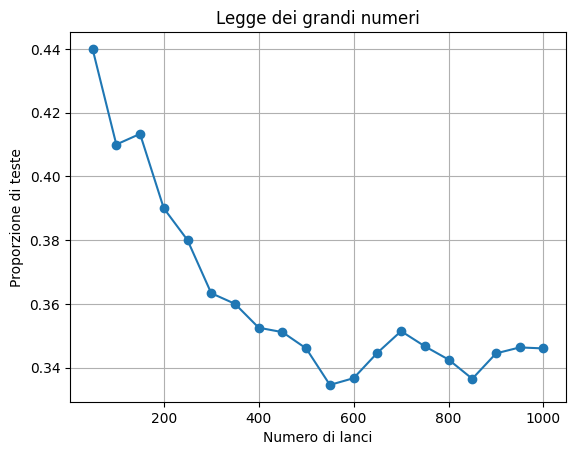

In [50]:
#Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. 
#Ogni lancio è rappresentato da 1 (testa) o 0 (croce)

import numpy as np 
import random
np.random.seed(42)
#lanci = np.random.binomial(1, 1/3, 1000)  # 1=successo(test), p=1/3
#lanci
lanci = np.random.choice([1, 0], size=1000, p=[1/3, 2/3]) #  probabilità (testa=33.3%, croce=66.6%)
lanci

# 1. Crea un array NumPy contenente i risultati.

testa = np.sum(lanci) # numeri di testa
croce = 1000 - testa # numeri di croce
testa , croce 
np.mean(lanci) # media , frequenza relativa

# 2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
proporzioni = np.cumsum(lanci)[49::50] / np.arange(50, 1001, 50)
proporzioni

#3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).
import matplotlib.pyplot as plt
np.random.choice(proporzioni, size=None, replace= True  )
plt.plot(range(50, 1001, 50), proporzioni, marker='o')
plt.xlabel("Numero di lanci")
plt.ylabel("Proporzione di teste")
plt.title("Legge dei grandi numeri")
plt.grid()
plt.show()




## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [ ]:
import numpy as np
import pandas as pd
import random
# Crea una funzione di nome **mat_normalizzata** 
# che prende come input una matrice e ritorna la matrice normalizzata
def mat_normalizzata(mat):
    media = np.mean(mat)
    deviazione_standard=np.std(mat)
    return  (mat - media) /np.std(mat)
# test:
np.random.rand(6,10)
arr= np.random.normal(5, 2, (6,10))
mat_normalizzata(arr)


array([[ 1.30206525,  1.41455757,  0.51935111,  0.97848346, -1.09521105,
        -1.32880107,  1.07549469, -0.10565191,  0.64796403, -0.61356813],
       [ 1.4287377 , -1.32160897, -1.18842417,  1.24579723, -2.24150568,
         0.32906633, -0.08889086, -0.62962251, -0.16855548, -0.72559418],
       [ 1.33004705,  1.55562171, -0.58642913,  0.24042992, -1.13637585,
         0.92644719,  0.90404552, -0.25054991,  0.01795304, -0.07722635],
       [-1.38873672,  1.33327117, -0.65628923, -0.65043659, -0.12595935,
         0.85978014, -0.50519854, -1.67580245, -0.75954942,  0.36826608],
       [ 1.88700893, -1.0803295 , -1.11179645, -1.29767602, -1.40444977,
         1.0405409 ,  1.28913053,  0.15633097, -0.39888847,  1.54413547],
       [ 0.15302112,  0.94054085, -0.44081037,  0.04148654, -1.06090808,
         0.54469642,  0.16766974, -0.76605683, -0.75448218,  1.39344453]])

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


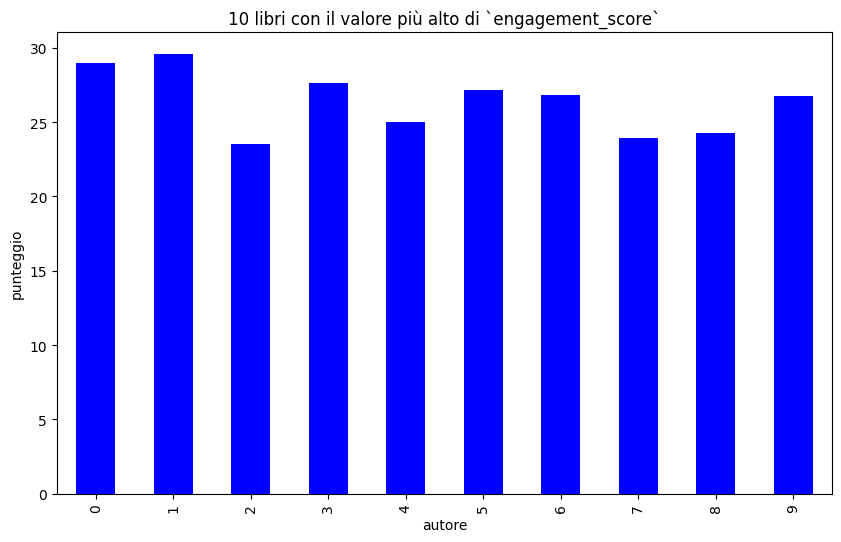

<Figure size 1000x600 with 0 Axes>

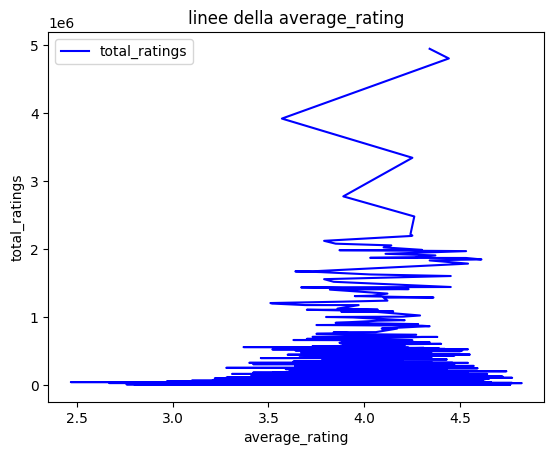

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,engagement_score,total_ratings
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,17.287522,10733
8977,8978,121792,121792,1429035,20,1417642122,9.781418e+12,Bill Watterson,1991.0,The Revenge of the Baby-Sat: A Calvin and Hobb...,...,206,12,40,570,2428,9896,https://images.gr-assets.com/books/1384734025m...,https://images.gr-assets.com/books/1384734025s...,19.126598,12946
7253,7254,24816,24816,2369970,23,836217691,9.780836e+12,Bill Watterson,1994.0,Homicidal Psycho Jungle Cat: A Calvin and Hobb...,...,289,13,53,696,2900,12067,https://images.gr-assets.com/books/1448818381m...,https://images.gr-assets.com/books/1448818381s...,19.544852,15729
9565,9566,70487,70487,2244439,24,1417642165,9.781418e+12,Bill Watterson,1992.0,Attack of the Deranged Mutant Killer Monster S...,...,233,15,30,514,2292,9346,https://images.gr-assets.com/books/1384735429m...,https://images.gr-assets.com/books/1384735429s...,18.820519,12197
8975,8976,39664,39664,24951203,37,896214400,9.780896e+12,Stephen King,1982.0,The Shawshank Redemption,...,788,16,115,1003,3776,7972,https://images.gr-assets.com/books/1315100686m...,https://images.gr-assets.com/books/1315100686s...,18.354354,12882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,1162543,1162543,2960529,183,031606792X,9.780316e+12,Stephenie Meyer,2008.0,Breaking Dawn,...,44550,100994,114893,213402,267706,410714,https://images.gr-assets.com/books/1361039438m...,https://images.gr-assets.com/books/1361039438s...,22.309089,1107709
48,49,49041,49041,3203964,194,316160199,9.780316e+12,Stephenie Meyer,2006.0,"New Moon (Twilight, #2)",...,44020,102837,160660,294207,290612,350684,https://images.gr-assets.com/books/1361039440m...,https://images.gr-assets.com/books/1361039440s...,21.333166,1199000
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,23.916917,2120637
33,34,10818853,10818853,15732562,169,1612130291,9.781612e+12,E.L. James,2011.0,Fifty Shades of Grey,...,75437,165455,152293,252185,294976,571909,https://images.gr-assets.com/books/1385207843m...,https://images.gr-assets.com/books/1385207843s...,22.484682,1436818


In [142]:
import numpy as np
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
df =pd.read_csv('books.csv')
df
#1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

df['engagement_score'] = df['average_rating'] * np.log10(1 + df['ratings_count'])
df['engagement_score']
#2. Trova il **libro con il valore massimo** di `engagement_score`.
df.loc[df['engagement_score'].idxmax(), 'authors']
df['engagement_score'].max()
df
# 3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.
df[df['average_rating']>4.5]
# 4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`
plt.figure(figsize=(10,6))
df['engagement_score'].head(10).plot.bar( x = 'authors', y = 'engagement_score', color = 'blue')
plt.title('10 libri con il valore più alto di `engagement_score`')
plt.xlabel('autore')
plt.ylabel('punteggio')
plt.show()
# 5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.
df['total_ratings'] = df[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum(axis=1)
df['total_ratings'] # numeri totale di libri valutati

plt.figure(figsize=(10,6))
df.sort_values('total_ratings').plot.line( x ='average_rating', y = 'total_ratings', color ='blue')
plt.title('linee della average_rating')
plt.xlabel('average_rating')
plt.ylabel('total_ratings')
plt.show()
df.sort_values(by='total_ratings', ascending= True, inplace= True)
df.sort_values(by='ratings_1', ascending= True, inplace= True)
df.sort_values(by='ratings_2', ascending= True, inplace= True)
#df.sort_values(by='ratings_3', ascending= True, inplace= True)
#df.sort_values(by='ratings_4', ascending= True, inplace= True)
#df.sort_values(by='ratings_5', ascending= True, inplace= True)
df.sort_values(by=['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5'], ascending= [True, True, True, True, True], inplace= True)
df

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.